# Manufacturing defects (30 points)

In [ ]:
# Run once to install the correct pacakge
#import sys
#!{sys.executable} -m pip install opencv-python
#!{sys.executable} -m pip install openpyxl


In [1]:
#import packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd

#### In previous notebooks you have already explored the importance of manufacturing parameters and curing cycles, specifically the Cure kinetics and Rheokinetics of composite production. The manufacturing process plays a crucial role when we try to guarantee a predictable part quality.

#### In this notebook you will be working on cases for which manufacturing did not reach the expected and predicted quality or, in other words, manufacturing related defects have been detected.

#### Understanding defects is an important part of composite manufacturing. Defects can (and will) occur during most manufacturing processes. You will learn to recognise defects, assess data for components with and without defects, how to deal with shrinkage of polymeric matrices, how to use image analysis to assess defects in fabric weaves, and reflect on the consequences of defects.

#### Defects in composites can be generally classified as one of the types shown in the graph (Figure 1) below.

<img src="defect_types.png" width="500" height="340">

Figure 1

## Question 1 (3 points)

#### A case study will be used in this question to start approaching the problem of defects. In this case you will be considering the X-33 liquid hydrogen (LH2) tank. During a protoflight structural test in November 1999, this tank failed catastrophically as can be seen below.

<img src="x33gobrrr.png" width="800" height="500">

Figure 2

##### From: NASA Langley Research Center, Hampton, Virginia, 23681, U.S.A.

#### As a first step, please read carefully the article provided with this notebook:
#### Ransom, Jonathan & Glaessgen, Edward & Raju, Ivatury & Knight, Norman & Reeder, James. (2008). Lessons Learned from Recent Failure and Incident Investigations of Composite Structures. 10.2514/6.2008-2317.

#### Question 1.1: For the case mentioned above, explain what the initial type of defect was, and why this is disadvantageous for composite parts in general. Refer to Figure 1 when writing in your answer.


The defect described in the paper was the contamination of the facesheet-core intercate by a piece of teflon tape. According to fifgure 1, this type of defect is classified as External --> Foreign Objects.
This type of defect is disadvantageous for composite parts, as any item that should hnto be within the material, has a chance of causing delamination of the composite layers it lies between. In this case, the teflon did not adhere well to either layer, and started the process of delamination between the layers, eventually leading to catastrophic failure.

#### Question 1.2: What could be the root causes of the initial defects? Suggest a modification to the manufacturing process to ensure that a new part produced through this method is less likely to exhibit the previously identified defects.

The teflon tape that wasd found between the layers was found to be a discard of the manufacturing process. In order to reduce the chance of such a defect, either the usaghe of teflon tape should be removed, or an accounting should be kept of every piece of teflon tape. If there is then a piece misssing, it must be accounted for before continuing with the process.
Additionally, for sections of teflon tape, or other materials that need to be cut to size, we can insure that the cutting itself occurs at a different location to the composite layering. In this way, the chance of very small foreign objects is reduced.

## Question 2 (2 points)
## Free shrinkage and residual stresses

### Additional defects that can occur in composites include micro-cracks, typically emerging from the combination of residual stresses with thermal cycling or mechanical loading. The primary cause of residual stresses at a micro-mechanical level is the disparity in shrinkage between the fibers and the matrix. Specifically, the polymer matrix tends to undergo considerably more shrinkage (dictated by the coefficient of thermal expansion, CTE) during consolidation and cooling compared to the contracting fibers.

<img src="shrinkage UD.png" width="600" height="400">

Figure 3

#### In this question we will work towards identifying the differences in shrinkage characteristics of two different thermoplastics (an amorphous and a semi-crystalline polymer). Draw typical storage modulus vs. temperature graphs for both categories. Display them in two different graphs. Explain the evolution of mechanical properties, including: how the Young's modulus evolves as a function of temperature, identification of relevant temperature points along the curve and what they represent.

For the amorphous polymer we can see a curve with a glass transition at Tg, where the storage modulus drops. Initially, below Tg, the polymer is in a glassy state with a high storage modulus, G'. The molecular chains are relatively immobile and the body exhibits a rigid, brittle behaviour. In the transition region, as the temperature increases, the polymer undergoes a transition from glassy to a rubbery state. This understanding is due to the increased mobility of the polymer chains which leads to more flexibility and toughness of the material. Beyond the transition region, in the rubbery state, the storage modulus is relatively low because the polymer chains are very mobile. The material presents elastic and ductile behaviour. Finally, if the heating continues, the polymer may present even lower values of G' and the material may soften or even melt. For the semi-crystalline polymer, we can see a curve with a more complex behaviour due to the presence of both amorphous and crystalline phases. Initially, the behaviour is similar to the amorphous polymer with a glassy state at temperatures below the glass transition temperature, Tg. As the temperature approaches the melting temperature, Tm, the crystalline regions start to melt and transform into an amorphous liquid, causing a gradual drop in storage modulus. However, the amorphous phase still contributes to the overall stiffness, maintaining a higher modulus compared to an amorphous polymer. Beyond Tm, G' continues decreasing as the polymer transitions into a fully molten state where the lower values of G' are consequence of the high mobility of the polymer chains. The Young's modulus is closely related to the storage modulus and its evolution is identical to the one explained.

## Question 3 (6 points)
#### When dealing with TP consolidation cycles, understanding shrinkage and the potential occurrence of residual stresses in a part is crucial when dealing with the design of consolidation cycles for thermoplastic composites.

#### For the production and autoclave consolidation of a 1 m wide and 2 m long panel using a single unidirectional lamina, two carbon fibre thermoplastic prepregs are under consideration: one with a Polycarbonate matrix and the other with a Polyamide matrix, both utilizing T1000 UD as the reinforcement. It concerns a zero-bleed prepreg with a fibre volume fraction of 55%. The consolidation cycle involves a 200°C dwell, maintained for 1 hour, followed by a cooling phase at 2°C/min until reaching room temperature (20°C). The consolidation cycle is shown in Figure 4 (the heating phase is not shown, as it is not relevant for this question). Equations and assumption that will help you answer the questions, are given below.

#### The longitudinal coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows: 
$$\alpha_{l} = \frac{(1-\nu_{f})E_{r}\alpha_{r}+ \nu_{f}E_{lf} \alpha_{lf}}{(1-\nu_{f})E_{r} +\nu_{f}E_{lf}}$$
#### The transverse coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows:
$$\alpha_{t} = (1-\nu_{f})\alpha_{r}+ \nu_{f}\alpha_{tf} +(1-\nu_{f})\alpha_{r}\nu_{r} +\nu_{12f}\alpha_{lf}\nu_{f} -\nu_{12}\alpha_{l}$$

#### Where $\nu_{f}$ represents fibre volume content, $E_{r}$ [GPa] Young's modulus of the matrix, $\nu_{r}$ the Poisson ratio of the matrix, $\alpha_{r}$ [1/°C] coefficient of linear thermal expansion of the matrix, $\alpha_{lf}$ [1/°C] and $\alpha_{tf}$ [1/°C] thermal expansion coefficients (CLTE) of fibres in the longitudinal and transverse direction, $E_{lf}$ [GPa] the longitudinal Young's modulus of the fibres, $\nu_{12}$ the in-plane Poisson ratio of the lamina and $\nu_{12f}$ Poisson’s ratio of the fibres.

#### The thermal strain (in longitudinal and transverse direction) can be calculated as follows: 
#### $$\epsilon = \int_{0}^{t} \alpha(t)\Delta Tdt$$

| Matrix        | Young's modulus [GPa] | Poisson ratio | CLTE [1/°C]          |
|---------------|-----------------------|---------------|----------------------|
| Polycarbonate | 1.4                   | 0.37          | $70.2 \cdot 10^{-6}$ |
| Polyamide 6   | 3                     | 0.39          | $85 \cdot 10^{-6}$   |

<img src="Cure cycle.jpg" width="1000" height="600">

Figure 4

#### The following assumptions are made:
#### - The lamina undergoes free shrinkage
#### - The properties of the resin and fibers, including volume fraction (vf), Poisson's ratio, and coefficient of linear thermal expansion (CLTE), are non-temperature dependent. The E-modulus for the fibers is also considered non-temperature dependent. However, the E-modulus of the thermoplastic resin changes throughout the consolidation cycle. Identify, provide and use the relevant properties for analysis.
#### - Poisson ratio of the lamina can be derived using the rule of mixtures


#### Question 3.1: Given the provided equations, material properties, consolidation cycle, and the listed assumptions, please calculate:
#### - the composite material's linear coefficient of thermal expansion (in longitudinal and transverse direction).
#### - the expected strain after reaching room temperature in both length and width direction of the panel
#### - the percentage of shrinkage in length and width direction of the panel

In [3]:
vf = 0.55
vr_PC = 0.37
vr_PA = 0.39
alpha_r_PC = 70.2*10**-6
alpha_r_PA = 85*10**-6
E_r_PC = 1.4
E_r_PA = 3
E_f = 294
alpha_f_l = -0.4*10**-6
alpha_f_t = 3.8*10**-6
v12_f = 0.18

def poisson_r(vr):
    v12 = vf*v12_f+(1-vf)*vr
    return v12

def longitudinalLC(E_r, alpha_r):
    alpha_l = ((1-vf)*E_r*alpha_r+vf*E_f*alpha_f_l)/((1-vf)*E_r+vf*E_f)
    return alpha_l

def transverseLC(alpha_r, vr, v12, alpha_l):
    alpha_t = (1-vf)*alpha_r+vf*alpha_f_t+(1-vf)*alpha_r*vr+v12_f*alpha_f_l*vf-v12*alpha_l
    return alpha_t

print("Longitudinal CLTE PC:", longitudinalLC(E_r_PC, alpha_r_PC))
print("Longitudinal CLTE PA:", longitudinalLC(E_r_PA, alpha_r_PA))

print("Transverse CLTE PC:", transverseLC(alpha_r_PC, vr_PC, poisson_r(vr_PC), longitudinalLC(E_r_PC, alpha_r_PC)))
print("Transverse CLTE PA:", transverseLC(alpha_r_PA, vr_PA, poisson_r(vr_PA), longitudinalLC(E_r_PA, alpha_r_PA)))

Longitudinal CLTE PC: -1.2600258732212163e-07
Longitudinal CLTE PA: 3.070837166513338e-07
Transverse CLTE PC: 4.536215368693402e-05
Transverse CLTE PA: 5.513360551977921e-05


In [4]:
T0 = 200
Tf = 20
dT = Tf - T0

def strain(alpha):
    integrand = lambda t: alpha*dT
    result, _ = quad(integrand, 0, 150)
    return result

print("Longitudinal strain of PC composite:", strain(longitudinalLC(E_r_PC, alpha_r_PC)))
print("Longitudinal strain of PA composite:", strain(longitudinalLC(E_r_PA, alpha_r_PA)))
print("Transverse strain of PC composite:", strain(transverseLC(alpha_r_PC, vr_PC, poisson_r(vr_PC), longitudinalLC(E_r_PC, alpha_r_PC))))
print("Transverse strain of PA composite:", strain(transverseLC(alpha_r_PA, vr_PA, poisson_r(vr_PA), longitudinalLC(E_r_PA, alpha_r_PA))))

Longitudinal strain of PC composite: 0.0034020698576972845
Longitudinal strain of PA composite: -0.008291260349586011
Transverse strain of PC composite: -1.2247781495472185
Transverse strain of PA composite: -1.488607349034039


#### Question 3.2: Provide insights on the outcomes of question 3.1 from:
#### - a composites standpoint: this should encompass expectations regarding the direction of highest strain or shrinkage, considerations about the acceptability of dimensional changes, and whether adjustments in the design would be necessary to accommodate these variations. 
#### - a matrix point of view: Offer commentary on the differences between the two thermoplastic resin materials (Polycarbonate and Polyamide), elucidating the reasons behind these differences in terms of their chemical composition, molecular structure, and thermal behaviors and which matrix option you would consider yielding the best mechanical properties or dimensional stability. 


Comment:

## Question 4 (2 points)
#### Residual stresses may emerge during composite manufacturing due to differential strains between the composite part and the tooling. This issue arises from the coefficient of thermal expansion (CTE) mismatch between the part and the mould/tooling. Residual stresses may potentially lead to lower load carrying capabilities, cracks and areas with resin-rich or resin-starved characteristics if not appropriately addressed. 

#### In the previous question, we assumed free shrinkage of the part. When shrinkage of a composite part during manufacturing is constrained by a material (with a different CTE), this shrinkage can be transformed into stress.

#### To effectively design a mold for the panel considered in question 3, three potential materials are under consideration: Aluminum 6061-T6, Invar 36, and CFRP composite. It is assumed that the mold is uniformly heated and monolithic throughout the process.

#### Find the coefficients of thermal expansion for this three possible mould materials (provide your sources) and discuss which one will be the most suitable option for the Polycarbonate and Polyamide CF reinforced parts from question 3.
#### You may also refer to this article: Zobeiry N, Park J, Poursartip A. An infrared thermography-based method for the evaluation of the thermal response of tooling for composites manufacturing. Journal of Composite Materials. 2019;53(10):1277-1290.



<img src="Mould CTE.PNG" width="800" height="400">

Figure 5: distortion due to shear interaction at tool interface


Comment: To determine the most suitable mold material for Polycarbonate (PC) and Polyamide CF reinforced parts, we need to consider the compatibility of the coefficients of thermal expansion (CTE) between the mold material and the molded parts. The goal is to minimize the potential for warping, cracking, or other issues caused by differential thermal expansion or contraction. The aim is to choose a mold material with a CTE that is close to that of the molded material so that the mold and the molded parts expand and contract at similar rates during the heating and cooling processes. For the different materials we found the following coefficients of thermal expansion: 25.210^-6/ºC for the Aluminum 6061-T6 [1], 1.3010^-6/ºC for the Invar 36 [2] and -0.7610^-6/ºC and 36.3410^-6/ºC for CFRP composite in the longitudinal and transverse directions, respectively [3]. Analysing them and comparing them to the coefficients obtained for the Polycarbonate and Polyamide CF reinforced parts in both directions we reach the conclusion that the CFRP composite appears to be the most suitable option in terms of both direction as it provides a better match in terms of thermal expansion characteristics, minimizing the risk of defects in the molded parts.

[1] https://www.matweb.com/search/DataSheet.aspx?MatGUID=b8d536e0b9b54bd7b69e4124d8f1d20a&ckck=1

[2] https://www.matweb.com/search/datasheet.aspx?matguid=

[3] Ahmed, Ashraf, et al. "Study of thermal expansion in carbon fiber-reinforced polymer composites." SAMPE international symposium proceedings. Charleston (SC), USA: SAMPE, 2012.

## Voids

#### Voids, one of the most extensively examined categories of manufacturing defects, frequently arise during the fabrication of fibre-reinforced composites. Given their significant impact on the physical and thermomechanical properties of the laminates, they have been subject to thorough investigation. In this notebook the following aspects will be taken into consideration: : the origin of voids, the quantification of voids through image analysis and the implications on the mechanical performance of the composite structure.

#### The graph shown below in Figure 6 (from Processing of Polymer Matrix Composites, P.K. Mallick) shows the correlation between shear strength, void content and autoclave cure cycle. The quality of advanced composites and their mechanical properties are strongly influenced by the void volume content. Therefore, solid knowledge on pressure, flow, temperature and material behaviour is required to properly design manufacturing processes.

<img src="shear vs. voids.png" width="600" height="800">

Figure 6

## Question 5 (5 points)

<img src="Capillary number.png" width="1100" height="400">

Figure 7

#### Use the concept of capillary number (exemplified in Figure 7 above) to explain the physical difference between capillary flow and viscous flow in a fibrous medium.
#### The flow properties influence the final mechanical part properties. How? Include in your answer which kind of flow would be preferred and which type of defects would occur (and where in your fibrous medium).


When infusing a part with resin, it is important to understand the difference between the capillary forces and the viscous forces driving the resin through the fibres. The capillary number is defined as the ration between the viscous forces and the capillary forces, i.e.

$$Ca = \frac{v\eta}{\gamma_a}$$

where $v$ is the resin flow velocity, $\nu$ is the viscosity of the resin and $\gamma_a$ is the surface tension of the resin. If the capillary number is <<1, the viscous forces are dominated by the capillary forces within the resin, thus mostly capillary flow will take place in the infusion. These forces are most present within the fibre tows, and way less within the "empty" channels in between the tows. Thus the resin flow front will advance more easily along the fibre tows, and lag behind in the channels. This can create voids within the channels as air can get trapped as the capillary flow surrounds the channel before it has properly infused itself. 

In case of a higher capillary number, the opposite is hapenning, namely that the viscous forces dominate within the resin, and thus it flows much easier along the channels within the fabric, and lags behind along the tows, where it is mainly dependent on capillary force. Voids are easier formed within the tows. 

In terms of flow properties, one wants to balance the viscous and capillary forces on the resin front, in order to have a balanced flow front in terms of speed of the resin along the tows/fibres and within the channels between tows. As shown in figure 7 above, there is an optimum capillary number at which the balance between capillary and viscous forces result in a minimum void content. As explained earlier, a capillary flow dominated infusion might lead to intra-tow void, i.e. in the channels, and a viscous dominated flow can result in poor tow infusion. 

As one wants to minimise void content within the part in order to ensure the final part reaches it's optimum mechanical properties, there is not one type of flow that is preferred over the other, but rather a carefull balance between capillary flow and viscous flow in order to minimise void formation.

## Question 6 (8 points)

## Image Analysis

#### Image analysis is useful when dealing with (prepreg) woven textiles, particularly for fiber volume content calculations, identifying waviness, and detecting defects. It also plays a crucial role in quality assurance by identifying and characterizing defects such as voids, wrinkles, and variations in resin distribution of the composite products. These defects can substantially affect the structural integrity of the final composite product. 

#### Image analysis techniques also add a quantitative dimension to defect assessment, offering measurements of defect size, shape, and distribution. This quantitative data is invaluable for optimising manufacturing processes and upholding stringent quality control standards.

#### A top view (2D) picture has been extracted from a 3D image of a woven fabric laminate and reported below.
#### The darker regions in the image can be identified as voids. Given the critical requirement for aerospace structures to maintain an acceptable volumetric void content of 1-2%, it becomes crucial to quantify void content rather than relying on qualitative observations of the image.
#### Question 6.1: Write a script to calculate the void content of the image provided. Then, comment on whether this percentage is acceptable or not. 

<img src="slice_0130.jpeg" width="700" height="700">

Figure 8

In [ ]:
img = cv2.imread('slice_0130.jpeg')
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh,bin = cv2.threshold(grey,80,255,cv2.THRESH_BINARY)
width = img.shape[1]
height = img.shape[0]

#Resize and plot to view the image
resized = cv2.resize(bin,(800,800))
cv2.imshow("Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Use original image for further analysis
void_fraction = (1-np.sum(bin)/(np.size(bin)*255))*100
print("The void fraction is ",void_fraction," %")


Comment:
The resulting void percentage is less than 1%. According to the information provided above, this falls within the acceptable range of less than 1-2% of voids. 
However, the above statement is somewhat ambigious, and hence, if the acceptable range is between 1-2%, this composite has too little voids.

#### Question 6.2: Now expand your previous code and apply the same technique to estimate the overall void volume content (in 3D) of the laminate. The folder provided with this notebook contains 107 slices obtained with microtomography. Using your algorithm from question 6.1 calculate the void content of each slice and report all the values in a single graph as a function of the slice number. Finally, calculate the average void content (in 3D) and comment on the difference/similarity with your answer in question 6.1. 
#### Please also comment on the applicability of 2D void content measurements to represent the overall void content of a product.

In [ ]:
void_list = []
for i in range(47,154):
    if i>= 100:
        filename = 'Slices/slice_0' + str(i) + '.jpeg'
    else: 
        filename = 'Slices/slice_00' + str(i) + '.jpeg'
    img = cv2.imread(filename)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh,bin = cv2.threshold(grey,80,255,cv2.THRESH_BINARY)
    void_fraction = (1-np.sum(bin)/(np.size(bin)*255))*100
    void_list.append(void_fraction)

plt.plot(range(47,154),void_list)
plt.xlabel('Slide number [-]')
plt.ylabel('Void fraction [%]')
plt.show()


ave_void_fraction = np.mean(void_list)
print("The average void fraction is ",ave_void_fraction," %")

Comment on the applicability:
We see large peaks in the void content per slide graph. This may be because some voids, expecially those seen as round bubbles, span multiple slices. Depending on the thickness of slices chosen, these bubble shaped voids may be over- or under-represented in the void content calculation. Additionally, when the thcikness of the slices is chosen to be too large, there may be voids that are not accounted for, as the depth resolution is not large enough. 

#### Question 6.3: What are the primary characterization techniques employed for void content evaluation? List three techniques. Could you outline the advantages and disadvantages of each technique? Additionally, which of these techniques, and any others covered in lectures, can be applied proactively (ex ante) to prevent void formation?

The first technique is to create image slices of the 3D object, and analyse them as presented here. This is a stutabel method as it is non-destructive when creating the images through the use of an x-ray or CT scan method. However, as discussed above, the method may be less acurate than other methods.

Another option is to use desnity based calculations, for example matrix burn-off. In this destructive method, the sample is heated to a temperature where the matrix starts to degrade. At the same time, the mass and volume is consistently measures. From here, the fibre, matrix and void content can be determined. As a downside this method is a destructive technique, meaning the samnple is destryoed in the process. Additionally, extensive machinery and apparatus is needed to perform these tests. They are however more accurate than the method descibed above.

Lastly, ultrasonic testing is also used to detremine the void content of composites. This is a non-destructive testing method, that sends ultrasonic energy inot the sample, there will be attenuation or dispersion of this pulse if there is a void or discontinuity present. This method is preferred over the previous two for testing during service, but requires a coupling agent (e.g. oil or water) to convey the ultrasonic waves. This may contaminate the part. Additionally, though the void content is known, unlike the first method, not much can be determined about the morphology of the voids themselves. 

Either of the non-destructive testing mechanisms culd be employed during production, especially parts are placed under pressure prior to the autoclave or heating. This means dry spots can be identified while the part may still be modified. However, it is most likely not very useful, as the matrix will still be able to fill these void to a certain extent. More research will have to be done on vpid progression through the curing process before this can be fully implemented.

#### Question 6.4: Image analysis on the image provided above (Figure 8, question 6.1) can also be useful to obtain an estimation of fibre volume fraction and matrix content.
#### To do this, first obtain and display the histogram of the woven fabric laminate, manipulate the initial image to obtain a better thresholding and describe what you did in terms of manipulation of the image, display the newly obtained histogram and then use this data to quantify the fibre and matrix content for the image provided.
#### Finally, comment on the fibre volume content you obtained.

In [ ]:
img = cv2.imread('slice_0130.jpeg')
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(grey, channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist) 
plt.show()

In [ ]:
threshold_value = 190
thresh,bin = cv2.threshold(grey,threshold_value,255,cv2.THRESH_BINARY)

resized = cv2.resize(bin,(800,800))
cv2.imshow("Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist(bin, channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist) 
plt.show()

fibre_fraction = (np.sum(bin)/(np.size(bin)*255))*100
print("The fibre volume fraction is ",fibre_fraction," %")

Comment:

The histogram was used to determine the thershold value to binarise the image and obtain the fibre volume content. It is not very clear in this image, but there should be two main peaks on the histogram; one for the fibres and one for the matrix. It was decided that in this example, the dip between the two barely visible peaks lies at approximately 190, hence this has been made the threshold.

The histogram of the newly binarised image is displayed, and this shows the clear seperation made between the peaks. Note that with this method the voids and the matrix are grouped together.

Lastly, the fibre volume content obtained, of 30%, is rather on thwe low end for polymer composites. It may be that the selection of the threshold value is not entirely correct and it should be chose lower. In reality, the test operator or composite designer should have some indication of what to expect from the composite, and a single slice is not a very reliable measurement for thw whole material. 


## Question 7 (4 points)

#### As it was mentioned at the beginning of the 'Voids' section, defects in composites have implications on the mechanical performance of the composite structure. In the next question, you will analyze two Force-Strain datasets for two similar samples. The samples are joined through continuous ultrasonic welding. Their cross-sectional micrographs are displayed below, and can be seen in Figure 9 and 10 respectively.
<img src="SLS_yes.jpg" width="400" height="240"> 

Figure 9

<img src="SLS_no.jpg" width="400" height="240">

Figure 10
#### Question 7.1: Examine Figure 9 and 10. One of these images shows a consolidated sample, the other one shows a defective sample. Please explain which figure belongs to which sample. Also provide a small discussion on the expected differences, and why these differences would occur.

#### Question 7.2: Attached are two datasets of Single Lap Shear tests, both with identical test settings. Each dataset contains the results of 5 samples. One of the datasets is derived from a reasonably well consolidated sample, while the other dataset coming from a defective sample. Plot and analyze the Stress-Strain graphs. Conclude which of the sets is of the defective sample, and explain the difference in plotted curves.

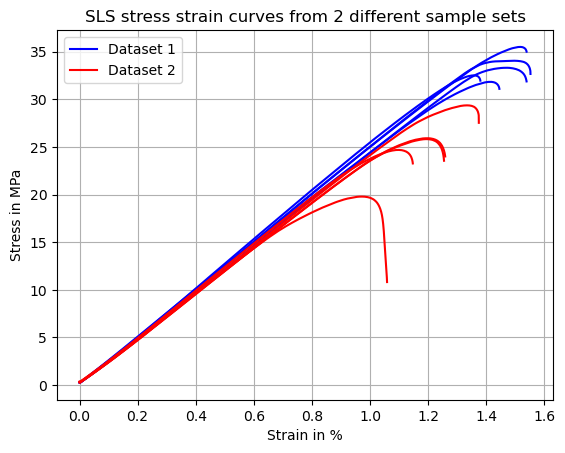

In [2]:
# Sample dimensions
Area1 = 322.58 #mm^2

file = pd.ExcelFile('weld1.xls')
sample1 = pd.read_excel(file,'sample1').to_numpy()
strain1 = sample1[2:,0]
force1  = sample1[2:,1]
stress1 = force1/Area1

sample2 = pd.read_excel(file,'sample2').to_numpy()
strain2 = sample2[2:,0]
force2  = sample2[2:,1]
stress2 = force2/Area1

sample4 = pd.read_excel(file,'sample4').to_numpy()
strain4 = sample4[2:,0]
force4  = sample4[2:,1]
stress4 = force4/Area1

sample5 = pd.read_excel(file,'sample5').to_numpy()
strain5 = sample5[2:,0]
force5  = sample5[2:,1]
stress5 = force5/Area1

sample6 = pd.read_excel(file,'sample6').to_numpy()
strain6 = sample6[2:,0]
force6  = sample6[2:,1]
stress6 = force6/Area1

plt.figure()
plt.plot(strain1,stress1,'b',label='Dataset 1')
plt.plot(strain2,stress2,'b')
plt.plot(strain4,stress4,'b')
plt.plot(strain5,stress5,'b')
plt.plot(strain6,stress6,'b')

file = pd.ExcelFile('weld2.xls')
sample1 = pd.read_excel(file,'sample1').to_numpy()
strain1 = sample1[2:,0]
force1  = sample1[2:,1]
stress1 = force1/Area1

sample2 = pd.read_excel(file,'sample2').to_numpy()
strain2 = sample2[2:,0]
force2  = sample2[2:,1]
stress2 = force2/Area1

sample4 = pd.read_excel(file,'sample4').to_numpy()
strain4 = sample4[2:,0]
force4  = sample4[2:,1]
stress4 = force4/Area1

sample5 = pd.read_excel(file,'sample5').to_numpy()
strain5 = sample5[2:,0]
force5  = sample5[2:,1]
stress5 = force5/Area1

sample6 = pd.read_excel(file,'sample6').to_numpy()
strain6 = sample6[2:,0]
force6  = sample6[2:,1]
stress6 = force6/Area1


plt.plot(strain1,stress1,'r',label='Dataset 2')
plt.plot(strain2,stress2,'r')
plt.plot(strain4,stress4,'r')
plt.plot(strain5,stress5,'r')
plt.plot(strain6,stress6,'r')

plt.xlabel(r"Strain in %")
plt.ylabel(r"Stress in MPa")
plt.legend()
plt.grid()
plt.title('SLS stress strain curves from 2 different sample sets')
plt.show()

#### Question 7.3: From your results of Q7.2, you should be able to derive that the elastic moduli are approximately similar for all samples. Explain why this is the case.